In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline 
import os
import pandas as pd
from scipy.io import wavfile as wav
import IPython.display as ipd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

EDA

In [ ]:
# loading an example of locking file
lock_file = '/content/drive/MyDrive/Dataset/AudioSamples/106.wav'
ipd.Audio(lock_file)

In [ ]:
#unlocking
unlock_file = '/content/drive/MyDrive/Dataset/AudioSamples/107.wav'
ipd.Audio(unlock_file)

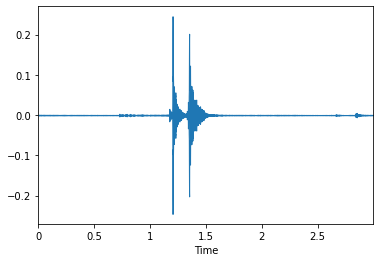

In [ ]:
lock_signal, sample_rate = librosa.load(lock_file)
librosa.display.waveplot(lock_signal, sr= sample_rate)

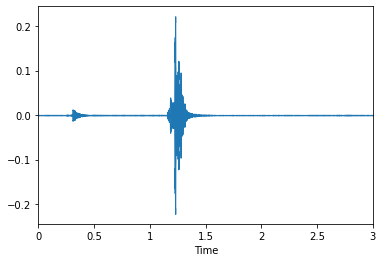

In [ ]:
unlock_signal, sample_rate = librosa.load(unlock_file)
librosa.display.waveplot(unlock_signal, sr= sample_rate)

In [ ]:
sample_rate

22050

In [ ]:
from scipy.io import wavfile as wav
lock_waveform_sample_rate, lock_waveform_audio= wav.read(lock_file)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


In [ ]:
lock_waveform_sample_rate

48000

In [ ]:
from scipy.io import wavfile as wav
unlock_waveform_sample_rate, unlock_waveform_audio= wav.read(unlock_file)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


In [ ]:
unlock_waveform_sample_rate

48000

In [ ]:
lock_signal

array([0.00010864, 0.00016844, 0.00010482, ..., 0.00039183, 0.00042787,
       0.        ], dtype=float32)

In [ ]:
unlock_signal

array([2.6665558e-04, 3.5712621e-04, 3.1142138e-04, ..., 6.1773448e-05,
       9.6318217e-05, 0.0000000e+00], dtype=float32)

In [ ]:
import csv
metadata = []
metadata=pd.read_csv('/content/drive/MyDrive/Dataset/Metadata/dataset.csv')
metadata.head(183)

,Filename,File_ID,Label_start_time,Label_end_time,Class_ID,Class
0,101.wav,101,1.434752,2.196239,1,Noise
1,102.wav,102,2.134391,2.403697,2,Lock
2,103.wav,103,1.035751,1.351489,3,Unlock
3,104.wav,104,0.228989,0.614376,1,Noise
4,105.wav,105,1.541818,2.665475,1,Noise
...,...,...,...,...,...,...
178,279.wav,279,1.262617,2.024103,1,Noise
179,280.wav,280,0.821669,2.558230,1,Noise
180,281.wav,281,0.863615,2.683754,1,Noise
181,282.wav,282,1.272732,2.071364,1,Noise


In [ ]:
# verifiying if the dataset is balanced or not
metadata['Class'].value_counts()

Noise     61
Lock      61
Unlock    61
Name: Class, dtype: int64

In [ ]:
librosa_lock_audio_data, librosa_lock_audio_sample_rate = librosa.load(lock_file)
librosa_unlock_audio_data, librosa_unlock_audio_sample_rate = librosa.load(unlock_file)

In [ ]:
librosa_lock_audio_sample_rate

22050

In [ ]:
librosa_unlock_audio_sample_rate

22050

In [ ]:
librosa_lock_audio_data

array([0.00010864, 0.00016844, 0.00010482, ..., 0.00039183, 0.00042787,
       0.        ], dtype=float32)

In [ ]:
librosa_unlock_audio_data

array([2.6665558e-04, 3.5712621e-04, 3.1142138e-04, ..., 6.1773448e-05,
       9.6318217e-05, 0.0000000e+00], dtype=float32)

In [ ]:
lock_waveform_audio

array([[ 5,  5],
       [ 5,  5],
       [ 5,  5],
       ...,
       [14, 14],
       [10, 11],
       [16, 14]], dtype=int16)

In [ ]:
unlock_waveform_audio

array([[13, 13],
       [11, 11],
       [10, 10],
       ...,
       [ 2,  3],
       [ 4,  2],
       [ 0,  2]], dtype=int16)

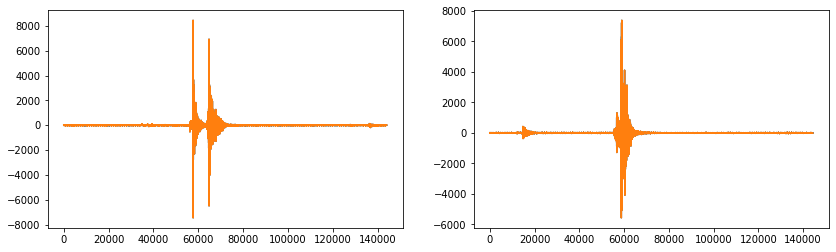

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(lock_waveform_audio)
plt.subplot(1,2,2)
plt.plot(unlock_waveform_audio)
plt.show()

Extracting MFCCs

In [ ]:
audio_samples_path = '/content/drive/MyDrive/Dataset/AudioSamples/'
metatdata = '/content/drive/MyDrive/Dataset/Metadata/dataset.csv'
metadata.head()

,Filename,File_ID,Label_start_time,Label_end_time,Class_ID,Class
0,101.wav,101,1.434752,2.196239,1,Noise
1,102.wav,102,2.134391,2.403697,2,Lock
2,103.wav,103,1.035751,1.351489,3,Unlock
3,104.wav,104,0.228989,0.614376,1,Noise
4,105.wav,105,1.541818,2.665475,1,Noise


In [ ]:
def feature_extraction(audio_sample):
  signal, sample_rate = librosa.load(audio_sample_name, res_type = 'kaiser_fast')
  mfcc = librosa.feature.mfcc(y = signal, sr=sample_rate, n_mfcc = 13 )
  scaled_mfcc = np.mean(mfcc.T, axis=0)

  return scaled_mfcc

In [48]:
from tqdm import tqdm
mfcc_values = []
for index_number, row in tqdm(metadata.iterrows()):
  audio_sample_name = os.path.join(os.path.abspath(audio_samples_path) +'/', str(row["Filename"]))
  updated_classes=row["Class"]
  updated_data=feature_extraction(audio_sample_name)
  mfcc_values.append([updated_data,updated_classes])

183it [00:16, 11.38it/s]


In [50]:
# converting this to dataframe

dataframe_features=pd.DataFrame(mfcc_values, columns=['Feature','Class'])
dataframe_features.head(15)

,Feature,Class
0,"[-564.2582, 106.28523, 7.603938, 22.85812, 12....",Noise
1,"[-662.9902, 74.07905, 19.683023, 28.935904, 11...",Lock
2,"[-666.4183, 94.86874, 6.421208, 38.59351, 5.08...",Unlock
3,"[-644.4803, 115.99466, 0.8357107, 43.562756, 2...",Noise
4,"[-595.33136, 109.7724, 5.058577, 23.701254, 8....",Noise
5,"[-669.1572, 96.8945, 5.657036, 40.68099, -0.07...",Lock
6,"[-670.0052, 82.706215, 18.051674, 29.771624, 1...",Unlock
7,"[-630.9255, 104.91, 11.123567, 36.372265, 4.73...",Noise
8,"[-570.066, 102.75393, 6.8395376, 23.21317, 8.2...",Noise
9,"[-664.5471, 92.96064, 2.6864727, 41.68134, 4.9...",Lock


In [ ]:
###Splitting the dataset into independent and dependent dataset
X=np.array(dataframe_features['Feature'].tolist())
y=np.array(dataframe_features['Class'].tolist())

In [ ]:
X.shape

(183, 13)

In [52]:
y.shape

(183, 3)

In [51]:
y

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1

In [49]:
X

array([[-5.6425818e+02,  1.0628523e+02,  7.6039381e+00, ...,
         7.0245361e+00,  2.3749709e+00,  6.2166266e+00],
       [-6.6299017e+02,  7.4079048e+01,  1.9683023e+01, ...,
         8.1435213e+00,  4.1144161e+00,  5.5328603e+00],
       [-6.6641827e+02,  9.4868736e+01,  6.4212079e+00, ...,
         1.0167654e+01,  6.5299731e-01,  6.1129246e+00],
       ...,
       [-4.4687207e+02,  1.0976414e+02, -9.7449093e+00, ...,
         3.9281495e+00,  1.6411508e+00,  5.7536302e+00],
       [-5.4364362e+02,  3.6514477e+01,  2.5686109e+00, ...,
        -1.3175220e+00,  1.7618836e-01,  2.8930275e+00],
       [-5.4352753e+02,  7.6613861e+01, -3.0359617e+01, ...,
         3.5263205e+00, -3.8998401e+00,  3.3791449e+00]], dtype=float32)

In [ ]:
##Label Encoding
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
label_encoding = LabelEncoder()
y=to_categorical(label_encoding.fit_transform(y))

In [63]:
##Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05, random_state=0)

In [ ]:
y

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1

In [ ]:
X_train

array([[-7.5942065e+02,  7.7400688e+01, -4.0422258e+00, ...,
         5.6784577e+00,  2.1422758e+00,  2.9499018e+00],
       [-5.7394891e+02,  9.1685326e+01,  1.9041965e+01, ...,
         5.6269760e+00,  2.1280859e+00,  3.5969591e+00],
       [-6.5949005e+02,  1.1945504e+02,  1.0936805e+01, ...,
         9.0701942e+00,  1.1936224e-01,  4.8355150e+00],
       ...,
       [-7.2149103e+02,  8.0541359e+01,  6.5998578e+00, ...,
         6.8166962e+00,  1.7014357e+00,  6.2800388e+00],
       [-6.4110986e+02,  1.1417099e+02,  8.0958118e+00, ...,
         7.2334876e+00,  9.4485641e-01,  5.1957459e+00],
       [-6.9781396e+02,  7.8403908e+01,  1.2233374e+01, ...,
         9.9689560e+00,  2.6869752e+00,  7.1805096e+00]], dtype=float32)

In [54]:
X_train.shape

(173, 13)

In [55]:
y_train.shape

(173, 3)

In [56]:
X_test.shape

(10, 13)

In [57]:
y_test.shape

(10, 3)

In [64]:
labels = y.shape[1] #3 = no of classes

In [83]:
ann_model=Sequential()

##input layer 
ann_model.add(Dense(256,input_shape=(13,))) ##input shape will be given wrt the number of features
ann_model.add(Activation('relu'))
ann_model.add(Dropout(0.2)) ##Droput layer helps prevent overfitting by randomly setting input units to 0 with a frequency of rate at each step during training time.
##second layer
ann_model.add(Dense(256))
ann_model.add(Activation('relu'))
#ann_model.add(Dropout(0.25))
##third layer
ann_model.add(Dense(128))
ann_model.add(Activation('relu'))
#ann_model.add(Dropout(0.1))
##fourth layer
ann_model.add(Dense(64))
ann_model.add(Activation('relu'))
ann_model.add(Dropout(0.2))
#fifth layer
ann_model.add(Dense(32))
ann_model.add(Activation('relu'))
##final layer
ann_model.add(Dense(3))
ann_model.add(Activation('softmax'))

In [84]:
ann_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 256)               3584      
                                                                 
 activation_36 (Activation)  (None, 256)               0         
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_37 (Dense)            (None, 256)               65792     
                                                                 
 activation_37 (Activation)  (None, 256)               0         
                                                                 
 dense_38 (Dense)            (None, 128)               32896     
                                                                 
 activation_38 (Activation)  (None, 128)              

In [85]:
ann_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer ='adam')
#optimiser = Adam(learning_rate=0.001)
#ann_model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
##Training my model

#from tensorflow.keras.callbacks import ModelCheckpoint
#from datetime import datetime

#num_epochs = 100 ##training the neural network with all the training data for 1 cycle
#num_batch_size = 32

#checkpointer = ModelCheckpoint(filepath='drive/MyDrive/Dataset/savedmodels/audio_classification.hdf5', verbose=1, save_best_only=True)
#start=datetime.now()

#history = ann_model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer])

#duration = datetime.now() - start
#print("Training completed in time", duration)

In [86]:
ann_model_history = ann_model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
6/6 [==============================] - 1s 47ms/step - loss: 9.1089 - accuracy: 0.4220 - val_loss: 3.6503 - val_accuracy: 0.4000
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 4.7761 - accuracy: 0.3410 - val_loss: 2.4786 - val_accuracy: 0.4000
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 3.1750 - accuracy: 0.3873 - val_loss: 2.6120 - val_accuracy: 0.3000
Epoch 4/100
6/6 [==============================] - 0s 10ms/step - loss: 3.1258 - accuracy: 0.3410 - val_loss: 2.0309 - val_accuracy: 0.3000
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 2.3041 - accuracy: 0.3931 - val_loss: 1.4772 - val_accuracy: 0.3000
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 2.3375 - accuracy: 0.3584 - val_loss: 1.0573 - val_accuracy: 0.3000
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 2.0889 - accuracy: 0.3237 - val_loss: 1.4218 - val_accuracy: 0.3000
Epoch 8/100
6/6 [=======

In [87]:
test_accuracy=ann_model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.699999988079071


In [91]:
def plot_history(history):
  fig = plt.figure(figsize=(12,10))
  fig, axs = plt.subplots(2)


 
  #create accuracy subplot
  axs[0].plot(history.history["accuracy"], label="Train accuracy")
  axs[0].plot(history.history["val_accuracy"], label="Validation accuracy")
  axs[0].set_ylabel("Accuracy")
  axs[0].legend(loc="lower right")
  axs[0].set_title("Accuracy evaluation")

  #create error subplot
  axs[1].plot(history.history["loss"], label="Train error")
  axs[1].plot(history.history["val_loss"], label="Validation error")
  axs[1].set_ylabel("Error")
  axs[1].set_xlabel("Epoch")
  axs[1].legend(loc="upper right")
  axs[1].set_title("Error evaluation")

  plt.tight_layout()
  plt.show()

  return history

<Figure size 864x720 with 0 Axes>

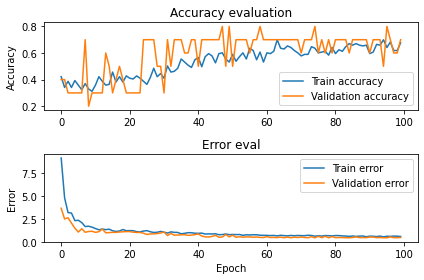

In [92]:
plot_history(ann_model_history)

In [ ]:
#creating train, validation and test split
#X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y,test_size=0.1)
#X_train_1, X_validation, y_train_1, y_validation = train_test_split(X_train_1, y_train_1, test_size=0.05)

#add an axis to input sets
#X_train_1 = X_train_1[..., np.newaxis]
#X_validation = X_validation[..., np.newaxis]
#X_test_1 = X_test_1[..., np.newaxis]

In [ ]:
#X_train_1.shape

In [ ]:
#from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization

In [ ]:
#input_shape = X_train_1.shape[1]

In [ ]:
# Builidng the CNN
#model_cnn = Sequential()

#1st conv layer
#model_cnn.add(Conv1D(256, 5, strides=1, padding="same", activation="relu", input_shape=(X_train_1.shape[1], 1),))
#model_cnn.add(MaxPooling1D((3,3), strides=(2,2), padding='same'))
#model_cnn.add(MaxPooling1D(3, strides=2, padding="same"))
#model_cnn.add(BatchNormalization())
#model_cnn.add(Dropout(0.4))


#2nd conv layer
#model_cnn.add(Conv1D(128, 5, strides=1, padding="same", activation='relu'))
#model_cnn.add(MaxPooling1D(3, strides=2, padding='same'))
#model_cnn.add(BatchNormalization())
#model_cnn.add(Dropout(0.4))


#3rd conv layer
#model_cnn.add(Conv1D(64, 4, activation='relu'))
#model_cnn.add(MaxPooling1D(2, strides=2, padding='same'))
#model_cnn.add(BatchNormalization())
#model_cnn.add(Dropout(0.4))

#flatten output and feed it into dense layer
#model_cnn.add(Flatten())
#model_cnn.add(Dense(128, activation='relu'))
#model_cnn.add(Dropout(0.4))

#output layer
#model_cnn.add(Dense(3, activation='softmax'))

In [ ]:
#model_cnn.summary()

In [ ]:
#model_cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
#cnn_history = model_cnn.fit(X_train_1, y_train_1, batch_size=32, epochs=100, validation_data=(X_validation, y_validation))

In [ ]:
#plot_history(cnn_history)